# Predicting the principal components of cortical morphological variables

Starting from the scaling law relating cortical thickness ($T$), total ($A_t$) and exposed ($A_e$) areas observed in [1], one can predict de principal components at the $\{ log T^2, log A_t, log A_e\}$ space and compare with experimental data using standard PCA. Considering different mammals, the principal components are the independent morphological variables derived in [2].

$$ T^{1/2} A_t = k A_{e}^{5/4}$$

[1] Science 349 (6243), 74-77

[2] NeuroImage, 226, 117546 (2021)

# 1. Cortical plane

The cortical rule impose a strong restriction on a feasible cortex. Considering $\{ log T^2, log A_t, log A_e\}$ space it defines a cortical plane:

$$ K \equiv log k = \frac{1}{4} log T^2 + log A_t - \frac{5}{4} log A_e$$

# 2. Same species

The same species usually has the same average cortical thickness, thus leading to a negligible variation at $log T^2$ direction

In [2]:
# libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler # Standardize for PCA
from sklearn.decomposition import PCA # PCA to compare with the predictions

from mpl_toolkits.mplot3d import Axes3D  #For 3D plot

In [3]:
# Harmonized dataset
df_to_analyze = pd.read_excel("All_datasets.xlsx")
df_to_analyze["logT2"] = 2*df_to_analyze["AvgThicknessnew_withAge"]

# Only young healthy cortex
condition = (df_to_analyze["Diagnostic"] == "CTL") & (df_to_analyze["ROI"] == "hemisphere") & (df_to_analyze["hemi"] == "R") & (df_to_analyze["Age"] < 40) & (df_to_analyze["Age"] > 20)
df = df_to_analyze[condition][["logT2","TotalArea_correctednew_withAge", "ExposedArea_correctednew_withAge"]].reset_index(drop=True).copy()

# Standardize for PCA
X = df.values[:,:]
X = np.nan_to_num(X)
dataset = StandardScaler().fit_transform(X)

pca = PCA(n_components=3).fit(dataset)

In [4]:
# Predicted principal components (normalized)
Karr = np.array([-1/4,-1,1.25])/np.sqrt((1/4)**2 + 1 + 1.25**2)
n1 = np.array([0,1.25,1])/np.sqrt( 1 + 1.25**2)
n2 = np.cross(Karr,n1)
n2 = n2/np.dot(n2,n2)

truecomp = np.vstack( (n1,n2,Karr) )

Text(0.5, 0, 'log($A_e$)')

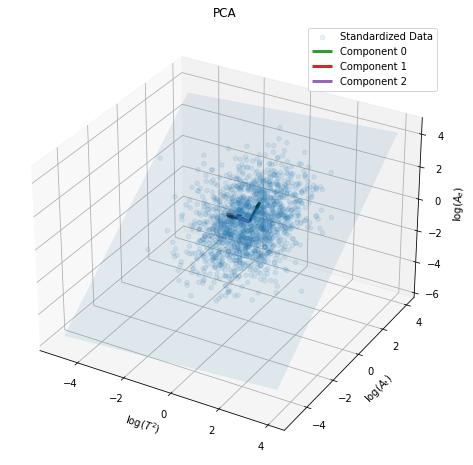

In [5]:
# uncomment for interactive visualization
#%matplotlib notebook

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], alpha=0.1, label="Standardized Data")

for i, comp in enumerate(pca.components_):
    ax.quiver(0,0,0, comp[0],comp[1],comp[2],label=f"Component {i}",linewidth=3, color=f"C{i + 2}")
    ax.quiver(0,0,0,truecomp[i][0],truecomp[i][1],truecomp[i][2],linewidth=2, color="black")

# Create the plane
point  = np.array([1, 1, 1])
M = pca.components_
normal = M[2]
d = -point.dot(normal)
xx, yy = np.meshgrid(np.arange(-5,5,1), range(-5,5,1))
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
ax.plot_surface(xx, yy, z, alpha=0.1)

ax.legend()
plt.title('PCA')
ax.set_xlabel(f"log($T^2$)")
ax.set_ylabel(f"log($A_t$)")
ax.set_zlabel(f"log($A_e$)")

In [6]:
print("Mismatch in direction (degrees):",180*np.arccos(np.dot(M[0],n1))/np.pi,  180*np.arccos(np.dot(M[1],n2) )/np.pi, 180*np.arccos(np.dot(M[2],Karr))/np.pi)

Mismatch in direction (degrees): 7.218466810973633 6.400138388036427 7.876832020571031


# 3. Different species

With no restrictions, the principal components should be the independent morphological variables $K$, $S$ and $I$ assuming that the interpretation given in [2] is correct and they are a natural set of variables, capturing distinct and ortogonal morphological characteristics of the cortex.

Text(0.5, 0, 'log($A_e$)')

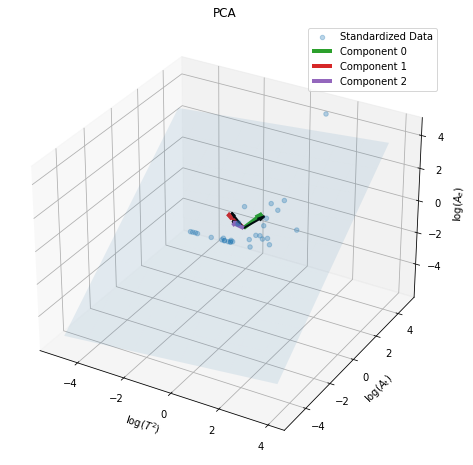

In [7]:
data = pd.read_excel('dados_Bruno_etal_Science_UniversalScaling.xlsx')
data['Ae (mm²)'] = data['At (mm²)']/data['FI']
data["logT2"] = 2*np.log10(data["T (mm)"])

#condition = (data['Dataset'] == 'our')
condition = (data['Dataset'] == 'other') & (data['FI'] < 2.5)
df = data[condition][["logT2","At (mm²)", "Ae (mm²)"]].reset_index(drop=True).copy()
X = df.values[:,:]
X = np.nan_to_num(X)
dataset = StandardScaler().fit_transform(X)

pca = PCA(n_components=3).fit(dataset)

Karr = np.array([-1/4,-1,1.25])/np.sqrt((1/4)**2 + 1 + 1.25**2)
Iarr = np.array([1,1,1])/np.sqrt(3)
Sarr = np.array([-9/4,3/2,3/4])/np.sqrt( (9/4)**2 +(3/2)**2 +(3/4)**2)
truecomp = np.vstack( (Iarr,Sarr,Karr) )

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], alpha=0.3, label="Standardized Data")
for i, comp in enumerate(pca.components_):
    ax.quiver(0,0,0, comp[0],comp[1],comp[2],label=f"Component {i}",linewidth=4, color=f"C{i + 2}")
    ax.quiver(0,0,0,truecomp[i][0],truecomp[i][1],truecomp[i][2],linewidth=2, color="black")    

point  = np.array([1, 1, 1])
M = pca.components_
normal = M[2]
d = -point.dot(normal)
xx, yy = np.meshgrid(np.arange(-5,5,1), range(-5,5,1))
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
ax.plot_surface(xx, yy, z, alpha=0.1)

ax.legend()
plt.title('PCA')
ax.set_xlabel(f"log($T^2$)")
ax.set_ylabel(f"log($A_t$)")
ax.set_zlabel(f"log($A_e$)")


In [8]:
M = pca.components_
print("Mismatch in direction (degrees):", 180*np.arccos(np.dot(M[0],Iarr))/np.pi,  180*np.arccos(np.dot(M[1],Sarr) )/np.pi, 180*np.arccos(np.dot(M[2],Karr))/np.pi) 

Mismatch in direction (degrees): 8.328150995797357 9.449754305032467 5.334246828816909


**Extra:** Simulation of the mismatch

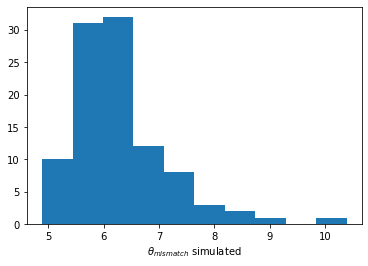

In [9]:
# Only young healthy cortex
condition = (df_to_analyze["Diagnostic"] == "CTL") & (df_to_analyze["ROI"] == "hemisphere") & (df_to_analyze["hemi"] == "R") & (df_to_analyze["Age"] < 40) & (df_to_analyze["Age"] > 20)
df = df_to_analyze[condition][["logT2","TotalArea_correctednew_withAge", "ExposedArea_correctednew_withAge"]].reset_index(drop=True).copy()

t2 = []
d0 = []
d1 = []
d2 = []
for sim in range(0,100):
    x1 = np.random.normal(df['logT2'].mean(), df['logT2'].std(), 1000)
    x2 = np.random.normal(df['TotalArea_correctednew_withAge'].mean(), df['TotalArea_correctednew_withAge'].std(), 1000)
    x3 = (x1*np.random.normal(0.25,0.01,1000) + x2*np.random.normal(1,0.01,1000))/np.random.normal(1.25,0.01,1000)

    X = np.array([x1,x2,x3]).T

    dataset = StandardScaler().fit_transform(X)
    pca = PCA(n_components=3).fit(dataset)

    M = pca.components_
    if 180*np.arccos(np.dot(M[2],Karr))/np.pi > 100:
        t2.append(180-180*np.arccos(np.dot(M[2],Karr))/np.pi)
    else:
        t2.append(180*np.arccos(np.dot(M[2],Karr))/np.pi)

plt.hist(t2)
plt.xlabel(r'$\theta_{mismatch}$ simulated')
plt.show()
